In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "Q3_2024_Foreign_Trade_Statistics_Tables.xlsx"
# Read the sheet names first
xls = pd.ExcelFile(file_path)
xls.sheet_names

['PRODUCT RANKING',
 'COUNTRY RANKING',
 'RE-EXPORT TABLE',
 'TABLE 1',
 'TABLE 2',
 'TABLE 3',
 'TABLE 4',
 'TABLE 5',
 'TABLE 5B',
 'TABLE 5C',
 'TABLE 6',
 'TABLE 7',
 'TABLE 8',
 'TABLE 9',
 'TABLE 10',
 'TABLE 13',
 'TABLE 14',
 'TABLE 14A',
 'TABLE 15',
 'TABLE 16',
 'TABLE 17',
 'TABLE 18',
 'TABLE 19',
 'TABLE 20']

In [3]:
df = pd.read_excel(file_path, sheet_name="TABLE 1")
df.head(20) #show first 20 rows

,Table 1 Summary of Foreign Trade (₦'Million) Q3 2024,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Imports,Exports(fob),Balance,Total Trade,Crude Oil Exports,Non_Crude Oil Exports,Non Oils Exports,Exports / Total Trade (%),Crude Oil /Total Exports (%),Non Oil Export/Total Export(%),% Change Imports,% Change Exports
1,2020.0,Jan-Dec,12700943.807826,12522684.443847,-178259.363979,25223628.251673,9444655.982638,3078028.461209,1433402.52346,49.646642,75.420378,11.446448,-25.111808,-34.751294
2,2021.0,Jan-Dec,20843964.952462,18907788.713772,-1936176.238689,39751753.666234,14410769.083667,4497019.630105,2141085.512313,47.564666,76.216047,11.323828,64.113512,50.988303
3,2022.0,Jan-Dec,25590547.409468,26796754.862632,1206207.453164,52387302.272099,21099177.584249,5697577.278382,2557034.546361,51.15124,78.737809,9.542329,22.771975,41.723367
4,2023.0,Jan-Dec,30863065.53619,35962392.442685,5099326.906495,66825457.978876,29000603.570431,6961788.872255,3143854.227383,53.815407,80.641475,8.742061,20.603382,34.204282
5,2024.0,Jan-Sept,42141998.006586,57199371.750964,15057373.744377,99341369.75755,41502394.73686,15696977.014104,6224946.610306,57.578602,72.557431,10.882893,NaN,NaN
6,2020.0,Q1,3576567.853432,4109769.937399,533202.083967,7686337.790831,2944596.780041,1165173.157358,623998.512136,53.468505,71.648701,15.183295,-33.143624,-13.851607
7,NaN,Q2,2433232.077136,2224953.154691,-208278.922445,4658185.231827,1553939.084147,671014.070544,352961.949612,47.764377,69.841429,15.863792,-31.967401,-45.861856
8,NaN,Q3,3184592.729006,2993464.334709,-191128.394297,6178057.063715,2424774.047338,568690.28737,215159.254125,48.453167,81.002269,7.187634,30.87912,34.540556
9,NaN,Q4,3506551.148252,3194497.017049,-312054.131203,6701048.165301,2521346.071112,673150.945936,241282.807587,47.671602,78.927795,7.553077,10.109877,6.71572


In [4]:
df = pd.read_excel(file_path, sheet_name="TABLE 1",
                   header=None)
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Table 1 Summary of Foreign Trade (₦'Million) ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Imports,Exports(fob),Balance,Total Trade,Crude Oil Exports,Non_Crude Oil Exports,Non Oils Exports,Exports / Total Trade (%),Crude Oil /Total Exports (%),Non Oil Export/Total Export(%),% Change Imports,% Change Exports
2,2020,Jan-Dec,12700943.807826,12522684.443847,-178259.363979,25223628.251673,9444655.982638,3078028.461209,1433402.52346,49.646642,75.420378,11.446448,-25.111808,-34.751294
3,2021,Jan-Dec,20843964.952462,18907788.713772,-1936176.238689,39751753.666234,14410769.083667,4497019.630105,2141085.512313,47.564666,76.216047,11.323828,64.113512,50.988303
4,2022,Jan-Dec,25590547.409468,26796754.862632,1206207.453164,52387302.272099,21099177.584249,5697577.278382,2557034.546361,51.15124,78.737809,9.542329,22.771975,41.723367
5,2023,Jan-Dec,30863065.53619,35962392.442685,5099326.906495,66825457.978876,29000603.570431,6961788.872255,3143854.227383,53.815407,80.641475,8.742061,20.603382,34.204282
6,2024,Jan-Sept,42141998.006586,57199371.750964,15057373.744377,99341369.75755,41502394.73686,15696977.014104,6224946.610306,57.578602,72.557431,10.882893,NaN,NaN
7,2020,Q1,3576567.853432,4109769.937399,533202.083967,7686337.790831,2944596.780041,1165173.157358,623998.512136,53.468505,71.648701,15.183295,-33.143624,-13.851607
8,NaN,Q2,2433232.077136,2224953.154691,-208278.922445,4658185.231827,1553939.084147,671014.070544,352961.949612,47.764377,69.841429,15.863792,-31.967401,-45.861856
9,NaN,Q3,3184592.729006,2993464.334709,-191128.394297,6178057.063715,2424774.047338,568690.28737,215159.254125,48.453167,81.002269,7.187634,30.87912,34.540556


In [5]:
# Rename first two columns 
df = df.rename(columns={0: "Year", 1: "Period"})

# Fill down the missing year values
df["Year"] = df["Year"].ffill()

In [6]:
df = df.dropna(how="all")
# drop rows that are completely empty

In [7]:
df.head(30)

,Year,Period,2,3,4,5,6,7,8,9,10,11,12,13
0,Table 1 Summary of Foreign Trade (₦'Million) ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Table 1 Summary of Foreign Trade (₦'Million) ...,NaN,Imports,Exports(fob),Balance,Total Trade,Crude Oil Exports,Non_Crude Oil Exports,Non Oils Exports,Exports / Total Trade (%),Crude Oil /Total Exports (%),Non Oil Export/Total Export(%),% Change Imports,% Change Exports
2,2020,Jan-Dec,12700943.807826,12522684.443847,-178259.363979,25223628.251673,9444655.982638,3078028.461209,1433402.52346,49.646642,75.420378,11.446448,-25.111808,-34.751294
3,2021,Jan-Dec,20843964.952462,18907788.713772,-1936176.238689,39751753.666234,14410769.083667,4497019.630105,2141085.512313,47.564666,76.216047,11.323828,64.113512,50.988303
4,2022,Jan-Dec,25590547.409468,26796754.862632,1206207.453164,52387302.272099,21099177.584249,5697577.278382,2557034.546361,51.15124,78.737809,9.542329,22.771975,41.723367
5,2023,Jan-Dec,30863065.53619,35962392.442685,5099326.906495,66825457.978876,29000603.570431,6961788.872255,3143854.227383,53.815407,80.641475,8.742061,20.603382,34.204282
6,2024,Jan-Sept,42141998.006586,57199371.750964,15057373.744377,99341369.75755,41502394.73686,15696977.014104,6224946.610306,57.578602,72.557431,10.882893,NaN,NaN
7,2020,Q1,3576567.853432,4109769.937399,533202.083967,7686337.790831,2944596.780041,1165173.157358,623998.512136,53.468505,71.648701,15.183295,-33.143624,-13.851607
8,2020,Q2,2433232.077136,2224953.154691,-208278.922445,4658185.231827,1553939.084147,671014.070544,352961.949612,47.764377,69.841429,15.863792,-31.967401,-45.861856
9,2020,Q3,3184592.729006,2993464.334709,-191128.394297,6178057.063715,2424774.047338,568690.28737,215159.254125,48.453167,81.002269,7.187634,30.87912,34.540556


In [8]:
file_path = "Q3_2024_Foreign_Trade_Statistics_Tables.xlsx"
sheet = "TABLE 1"

# load raw as-is
raw = pd.read_excel(file_path, sheet_name=sheet, header=None)

# Find the header row by looking for a row that contains "Imports"
hdr_idx_candidates = raw.apply(lambda r:
                             r.astype(str).str.contains(r"\bImports\b", case=False,
                                                        na=False).any(), axis=1)
header_row = raw.index[hdr_idx_candidates][0]

# Build column names from that row
headers = raw.iloc[header_row].tolist()

# Force first two headers to be Year/Period (since they're usually blank in the file)
if len(headers) >= 2:
    headers[0] = "Year"
    headers[1] = "Period"

    def clean_colname(s):
        s = str(s)
        s = s.replace("'","'") #normalise weird apostrophes
        s = re.sub(r"[\(\)%]", "", s)
        s = re.sub(r"\s+", "_", s.strip().lower())
        return s

headers = [clean_colname(h) for h in headers]

# Slice data rows under the header row and assign headers
df = raw.iloc[header_row+1:].copy()
df.columns = headers

# Drop fully_empty rows/cols
df = df.dropna(how="all")
df = df.loc[:, df.columns.notna()]

In [9]:
# Forward-fill Year values (they're blank after the first row of each block
if "year" in df.columns:
    df["year"] = df["year"].replace(["", "nan", "None"], np.nan).ffill()

# Remove the "Table 1 Summary..." title rows if any slipped in 
df = df[~df["year"].astype(str).str.contains(r"table\s*1", case=False, na=False)]

# Keep rows that have a Period value
df = df[df["period"].notna()].copy()

# Identify numeric columns (everything except 'year' and 'period')
num_cols = [c for c in df.columns if c not in ("year", "period")]

# Clean numeric columns: remove non-numeric chars (commas, spaces, etc.) and convert
for c in num_cols:
    df[c] = (
        df[c]
        .astype(str)
        .str.replace(r"[^\d\.\-]", "", regex=True)
        .replace({"": np.nan, ".": np.nan})
    )
    df[c] = pd.to_numeric(df[c], errors="coerce")
df.head(10)

,year,period,imports,exportsfob,balance,total_trade,crude_oil_exports,non_crude_oil_exports,non_oils_exports,exports_/_total_trade,crude_oil_/total_exports,non_oil_export/total_export,change_imports,change_exports
2,2020,Jan-Dec,1.270094e+07,1.252268e+07,-1.782594e+05,2.522363e+07,9.444656e+06,3.078028e+06,1.433403e+06,49.646642,75.420378,11.446448,-25.111808,-34.751294
3,2021,Jan-Dec,2.084396e+07,1.890779e+07,-1.936176e+06,3.975175e+07,1.441077e+07,4.497020e+06,2.141086e+06,47.564666,76.216047,11.323828,64.113512,50.988303
4,2022,Jan-Dec,2.559055e+07,2.679675e+07,1.206207e+06,5.238730e+07,2.109918e+07,5.697577e+06,2.557035e+06,51.151240,78.737809,9.542329,22.771975,41.723367
5,2023,Jan-Dec,3.086307e+07,3.596239e+07,5.099327e+06,6.682546e+07,2.900060e+07,6.961789e+06,3.143854e+06,53.815407,80.641475,8.742061,20.603382,34.204282
6,2024,Jan-Sept,4.214200e+07,5.719937e+07,1.505737e+07,9.934137e+07,4.150239e+07,1.569698e+07,6.224947e+06,57.578602,72.557431,10.882893,NaN,NaN
7,2020,Q1,3.576568e+06,4.109770e+06,5.332021e+05,7.686338e+06,2.944597e+06,1.165173e+06,6.239985e+05,53.468505,71.648701,15.183295,-33.143624,-13.851607
8,2020,Q2,2.433232e+06,2.224953e+06,-2.082789e+05,4.658185e+06,1.553939e+06,6.710141e+05,3.529619e+05,47.764377,69.841429,15.863792,-31.967401,-45.861856
9,2020,Q3,3.184593e+06,2.993464e+06,-1.911284e+05,6.178057e+06,2.424774e+06,5.686903e+05,2.151593e+05,48.453167,81.002269,7.187634,30.879120,34.540556
10,2020,Q4,3.506551e+06,3.194497e+06,-3.120541e+05,6.701048e+06,2.521346e+06,6.731509e+05,2.412828e+05,47.671602,78.927795,7.553077,10.109877,6.715720
11,2021,Q1,4.875188e+06,2.984932e+06,-1.890256e+06,7.860120e+06,2.042898e+06,9.420340e+05,3.678706e+05,37.975655,68.440354,12.324255,39.030849,-6.560190


In [10]:
period = df["period"].astype(str).str.strip()

# Define masks
quarterly_mask = period.str.match(r"^Q[1-4]$", case=False)

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Sept", "Oct", "Nov", "Dec"]
monthly_mask = period.str.title().isin(months)

# Annual usually shows "Jan-Dec" or a YTD like "Jan-Sept"
annual_mask = (
    period.str.contains("jan", case=False)
    & period.str.contains("-", case=False) #dash between months
)

annual_df = df[annual_mask].copy()
quarter_df = df[quarterly_mask].copy()
monthly_df = df[monthly_mask].copy()

# Normalize month names (Sept-> Sep) and add month order for sorting later 
month_map = {"Sept":"Sep"} # normalize 
monthly_df["period"] = monthly_df["period"].replace(month_map)
month_order = {m:i for i,m in
               enumerate(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], start=1)}
monthly_df["month_num"] = monthly_df["period"].str.title().map(month_order)

# Add a helpful 'frequency' flag
annual_df["frequency"] = "annual_or_ytd"
quarter_df["frequency"] = "quarterly"
monthly_df["frequency"] = "monthly"

annual_df.head(5), quarter_df.head(5), monthly_df.head(5)

(   year    period       imports    exportsfob       balance   total_trade  \
 2  2020   Jan-Dec  1.270094e+07  1.252268e+07 -1.782594e+05  2.522363e+07   
 3  2021   Jan-Dec  2.084396e+07  1.890779e+07 -1.936176e+06  3.975175e+07   
 4  2022   Jan-Dec  2.559055e+07  2.679675e+07  1.206207e+06  5.238730e+07   
 5  2023   Jan-Dec  3.086307e+07  3.596239e+07  5.099327e+06  6.682546e+07   
 6  2024  Jan-Sept  4.214200e+07  5.719937e+07  1.505737e+07  9.934137e+07   
 
    crude_oil_exports  non_crude_oil_exports  non_oils_exports  \
 2       9.444656e+06           3.078028e+06      1.433403e+06   
 3       1.441077e+07           4.497020e+06      2.141086e+06   
 4       2.109918e+07           5.697577e+06      2.557035e+06   
 5       2.900060e+07           6.961789e+06      3.143854e+06   
 6       4.150239e+07           1.569698e+07      6.224947e+06   
 
    exports_/_total_trade  crude_oil_/total_exports  \
 2              49.646642                 75.420378   
 3              47.564

In [11]:
annual_df.to_csv("table1_annual_or_ytd.csv", index=False)
quarter_df.to_csv("table1_quarterly.csv", index=False)
monthly_df.to_csv("table1_monthly.csv", index=False)

print("Saved: table1_annual_or_ytd.csv, table1_quarterly.csv, table1_monthly.csv")

Saved: table1_annual_or_ytd.csv, table1_quarterly.csv, table1_monthly.csv


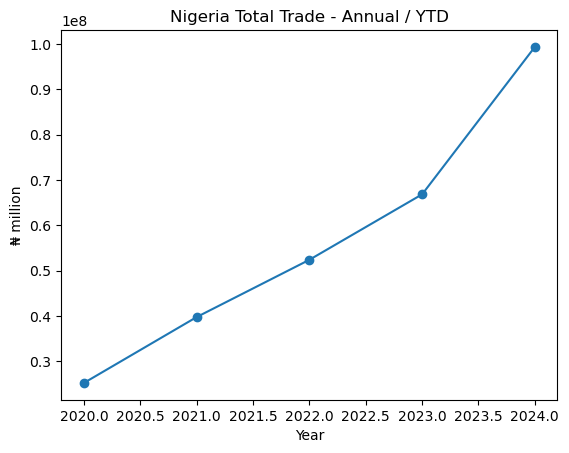

In [12]:
if "total_trade" in annual_df.columns:
    annual_plot = (

        annual_df.assign(year_numeric=pd.to_numeric(annual_df["year"], errors="coerce"))
        .dropna(subset=["year_numeric","total_trade"]
               )
        .sort_values("year_numeric")
    )
    plt.figure()
    plt.plot(annual_plot["year_numeric"], annual_plot["total_trade"], marker="o")
    plt.title("Nigeria Total Trade - Annual / YTD")
    plt.xlabel("Year")
    plt.ylabel("\u20A6 million")
    plt.show()

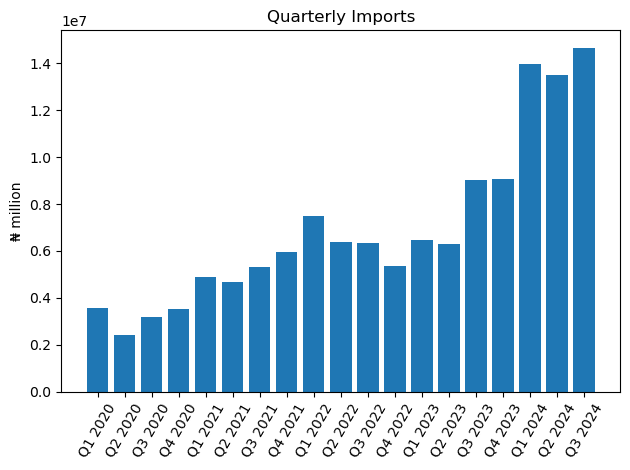

In [13]:
cols_present = [c for c in
                ["exports_fob","imports","total_trade"]
                if c in quarter_df.columns]
q = quarter_df.copy()
if cols_present:
    q["year_num"] = pd.to_numeric(q["year"], errors="coerce")
    q = q.dropna(subset=["year_num"]).sort_values(["year_num","period"])
    plt.figure()
    plt.bar(q["period"] + " " + q["year"].astype(str), q[cols_present[0]])
    plt.title(f"Quarterly {cols_present[0].replace('_',' ').title()}")
    plt.xticks(rotation=60)
    plt.ylabel("\u20A6 million")
    plt.tight_layout()
    plt.show()

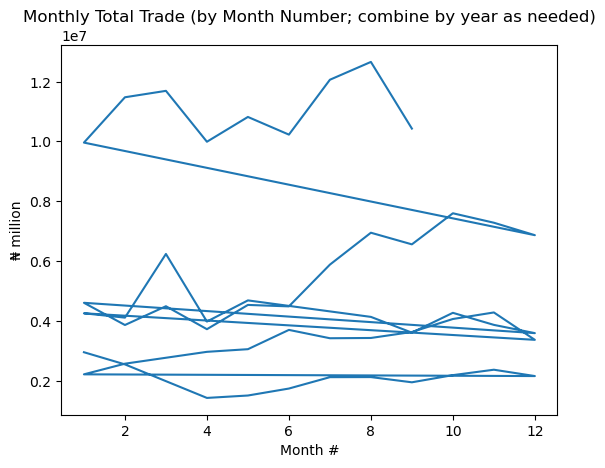

In [14]:
m = monthly_df.copy()
if "total_trade" in m.columns:
    m["year_num"] = pd.to_numeric(m["year"], errors="coerce")
    m = m.dropna(subset=["year_num","month_num"]).sort_values(["year_num","month_num"])
    plt.figure()
    plt.plot(m["month_num"], m["total_trade"])
    plt.title("Monthly Total Trade (by Month Number; combine by year as needed)")
    plt.xlabel("Month #")
    plt.ylabel("\u20A6 million")
    plt.show()

In [18]:
# Make sure columns are clean
quarter_df.columns = quarter_df.columns.str.strip().str.lower()

# Get Q2 and #Q3 totals
q2_2024 = quarter_df.loc[(quarter_df["year"] == 2024) & (quarter_df["period"] == "Q2"), "total_trade"].values[0]
q3_2024 = quarter_df.loc[(quarter_df["year"] == 2024) & (quarter_df["period"] == "Q3"), "total_trade"].values[0]

# Calculate percentage change
pct_change = ((q3_2024 - q2_2024) / q2_2024) * 100

print(f"Q3 2024 shows a {pct_change: .2f}% change compared to Q2 2024.")

Q3 2024 shows a  13.26% change compared to Q2 2024.


In [17]:
print(quarter_df.columns.tolist())

['year', 'period', 'imports', 'exportsfob', 'balance', 'total_trade', 'crude_oil_exports', 'non_crude_oil_exports', 'non_oils_exports', 'exports_/_total_trade', 'crude_oil_/total_exports', 'non_oil_export/total_export', 'change_imports', 'change_exports', 'frequency']
